In [35]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import tree
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import joblib
import graphviz


from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [36]:
df = pd.read_csv('../data/cleaned-premier-onehot.csv')

## Using Random forest model

In [37]:
def get_outcome(row):
    if row["home_outcome_W"] == 1:
        return 2  # win
    elif row["home_outcome_D"] == 1:
        return 1  # draw
    elif row["home_outcome_L"] == 1:
        return 0  # loss

df["match_result"] = df.apply(get_outcome, axis=1)

### Making new feature to help prediction

In [38]:
df["ranking_diff"] = abs(df["home_ranking"] - df["away_ranking"])

df["form_diff"] = abs(
    (df["home_season_wins_so_far"] - df["home_season_losses_so_far"]) -
    (df["away_season_wins_so_far"] - df["away_season_losses_so_far"])
)
df["odds_ratio"] = df["avg_odd_home_win"] / df["avg_odd_away_win"]

df["draw_margin"] = df["avg_odd_draw"] - ((df["avg_odd_home_win"] + df["avg_odd_away_win"]) / 2)

In [39]:
# features = [
#     "avg_odd_home_win",
#     "avg_odd_draw",
#     "avg_odd_away_win",
#     "home_ranking",
#     "away_ranking",
#     "ranking_diff",
#     "odds_ratio",
#     "draw_margin"
# ]

In [40]:
features = [
    "avg_odd_home_win",
    "avg_odd_draw",
    "avg_odd_away_win",
    "form_diff",
    "ranking_diff",
    "odds_ratio",
    "draw_margin"
]

In [41]:
# features = [
#     "avg_odd_home_win", "avg_odd_draw", "avg_odd_away_win",
#     "home_ranking", "away_ranking",
#     "home_total_wins_so_far", "home_total_draws_so_far", "home_total_losses_so_far",
#     "away_total_wins_so_far", "away_total_draws_so_far", "away_total_losses_so_far",
#     "form_diff", "ranking_diff", "odds_ratio", "draw_margin",
# ]

### scale the data

In [42]:
X = df[features]
y = df["match_result"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### Train the model

In [43]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.25, random_state=42, stratify=y
)

In [44]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    class_weight="balanced",
    random_state=42
)

# 🧠 Train
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## validate the model

In [45]:
print("\nFeatures used:")
for f in features:
    print(" -", f)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

labels = [0, 1, 2]
names = ["loss", "draw", "win"]    

print("\nClassification Report:")
print(classification_report(y_test, y_pred, labels=labels, target_names=names))


Features used:
 - avg_odd_home_win
 - avg_odd_draw
 - avg_odd_away_win
 - form_diff
 - ranking_diff
 - odds_ratio
 - draw_margin

Confusion Matrix:
[[39 14 42]
 [21 14 46]
 [26 23 87]]

Classification Report:
              precision    recall  f1-score   support

        loss       0.45      0.41      0.43        95
        draw       0.27      0.17      0.21        81
         win       0.50      0.64      0.56       136

    accuracy                           0.45       312
   macro avg       0.41      0.41      0.40       312
weighted avg       0.43      0.45      0.43       312



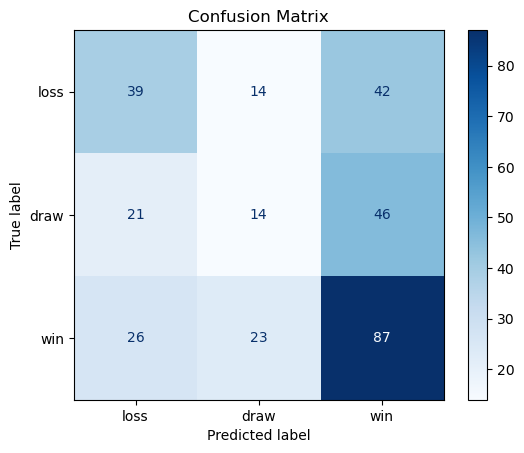

In [46]:
# Define label names
labels = [0, 1, 2]
names = ["loss", "draw", "win"]

# Plot confusion matrix
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=names,
    cmap=plt.cm.Blues,
    normalize=None  # You can set this to 'true' or 'pred' if you want normalized values
)

plt.title("Confusion Matrix")
plt.show()



🔎 Feature Importances (Random Forest):
avg_odd_home_win               0.1576
avg_odd_draw                   0.1509
avg_odd_away_win               0.1692
form_diff                      0.0974
ranking_diff                   0.1076
odds_ratio                     0.1658
draw_margin                    0.1515


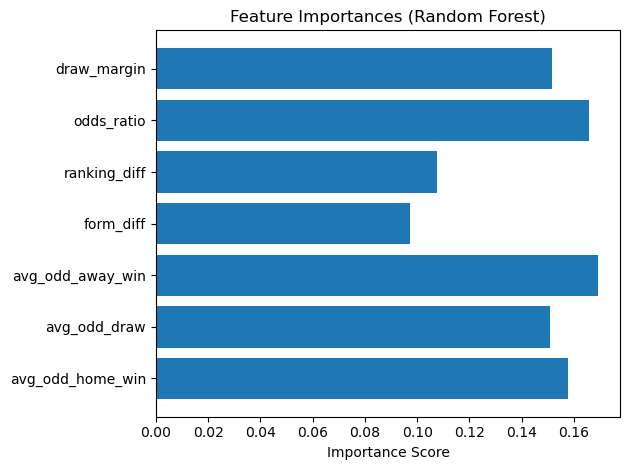

In [47]:
importances = model.feature_importances_

print("\n🔎 Feature Importances (Random Forest):")
for feat, score in zip(features, importances):
    print(f"{feat:<30} {score:.4f}")

plt.barh(features, importances)
plt.title("Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.tight_layout()
plt.show()

### Model Behavior Analysis

In [48]:
joblib.dump(model, '../Models/random-forest2-model.pkl')

['../Models/random-forest2-model.pkl']